# Exploring the Housing Dataset
* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk - 0.63)^2, where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in $1000s

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                  header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


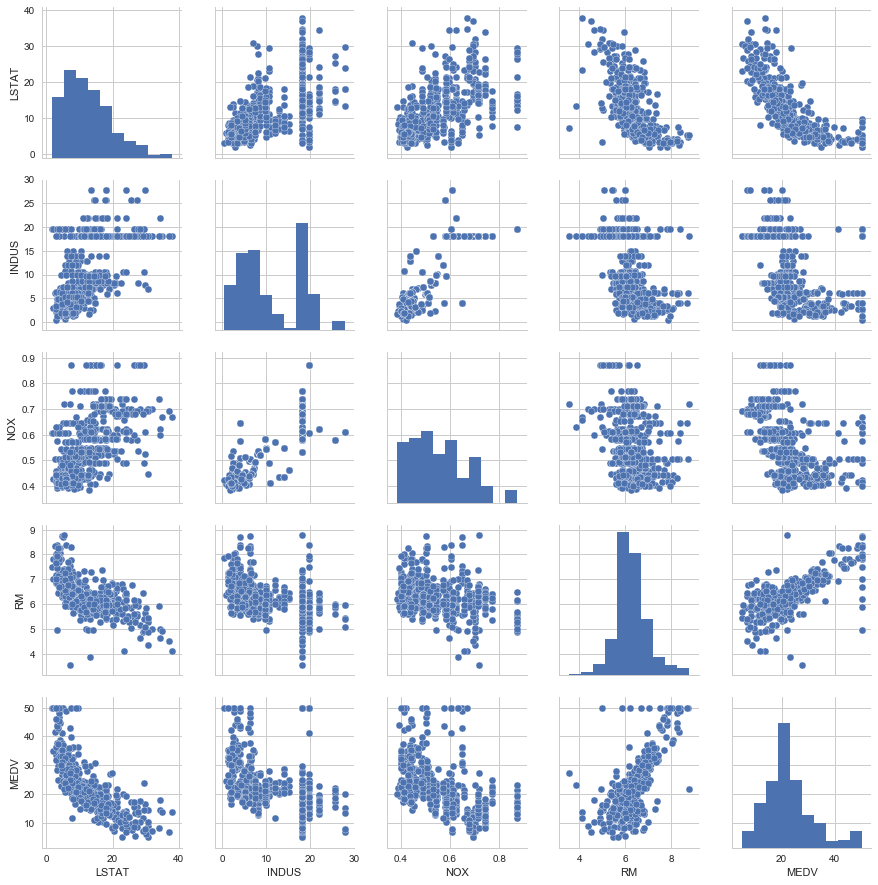

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", context="notebook")
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.show()

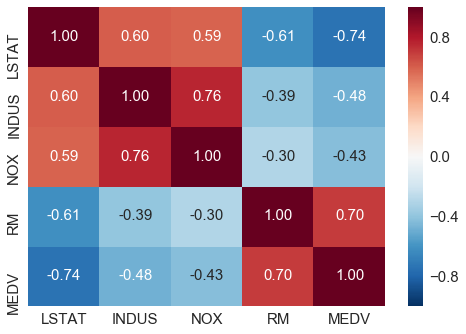

In [3]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                fmt=".2f",
                annot_kws={"size":15},
                yticklabels=cols,
                xticklabels=cols)
plt.show()

# Implementing an ordinary least squares linear regression model

In [4]:
class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self    
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [5]:
X = df[["RM"]].values
y = df["MEDV"].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

/home/jeovach/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/jeovach/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


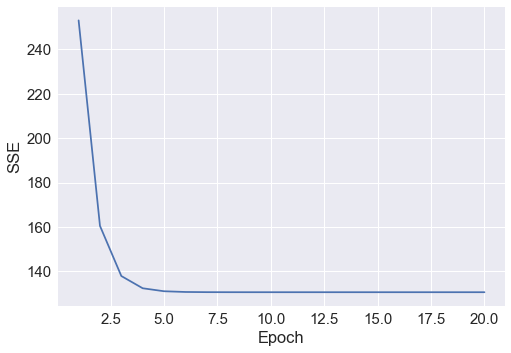

In [6]:
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel("SSE")
plt.xlabel("Epoch")
plt.show()

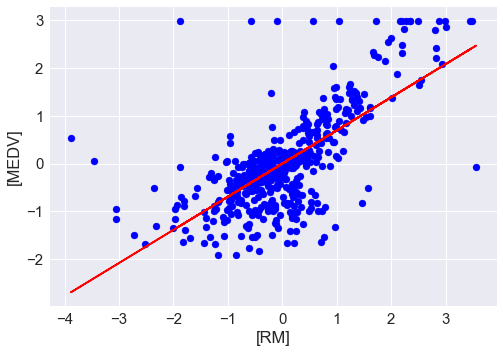

In [7]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c="blue")
    plt.plot(X, model.predict(X), color="red")
    return None
lin_regplot(X_std, y_std, lr)
plt.xlabel("[RM]")
plt.ylabel("[MEDV]")
plt.show()

# Estimating the coefficient of a regression model via scikit-learn

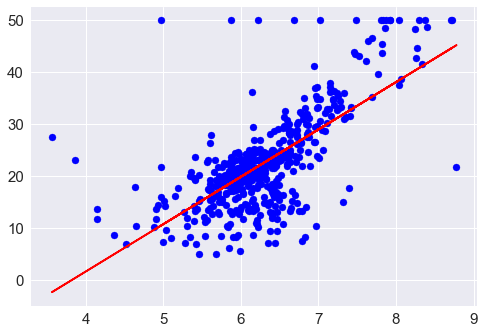

In [8]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
lin_regplot(X, y, slr)

# Fitting a robust regression model using RANSAC
* RANdom SAmple Consensus (RANSAC)

In [9]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), 
                             max_trials=100, 
                             min_samples=50, 
                             loss='absolute_loss', 
                             residual_threshold=5.0, 
                             random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=50, random_state=0,
        residual_metric=None, residual_threshold=5.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

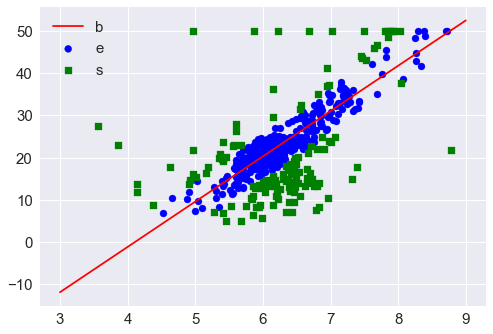

In [10]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
           c="blue", marker="o", label="Inliers")
plt.scatter(X[outlier_mask], y[outlier_mask],
           c="green", marker="s", label="outliers")
plt.plot(line_X, line_y_ransac, color="red")
plt.legend("best")
plt.show()

# Evaluating the performance of linear regression models 

In [11]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:, :-1].values
y = df["MEDV"].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

/home/jeovach/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


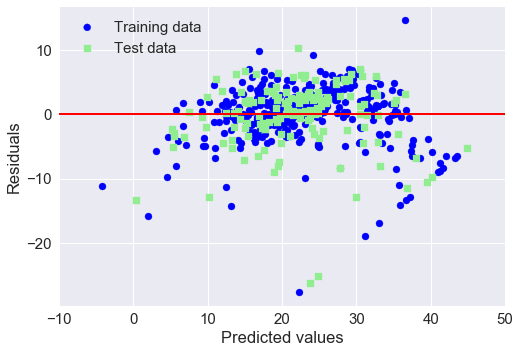

In [12]:
plt.scatter(y_train_pred, y_train_pred-y_train,
           c="blue", marker="o", label="Training data")
plt.scatter(y_test_pred, y_test_pred-y_test,
           c="lightgreen", marker="s", label="Test data")
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
print("MSE train: %3f, test: %3f" %(
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958220, test: 27.195966


In [14]:
from sklearn.metrics import r2_score
print("R^2 train: %.3f, test %.3f" %(
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test 0.673


# Turning a linear regression model into a curve – polynomial regression

1.	 Add a second degree polynomial term:

In [15]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0, 270.0, 294.0,
              320.0, 342.0, 368.0,
              396.0, 446.0, 480.0,
              586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8,
              298.6, 314.2, 342.2,
              360.8, 368.0, 391.2,
              390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

2.Fit a simple linear regression model for comparison:

In [16]:
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, None]
y_lin_fit = lr.predict(X_fit)

3.	 Fit a multiple regression model on the transformed features for polynomial regression:

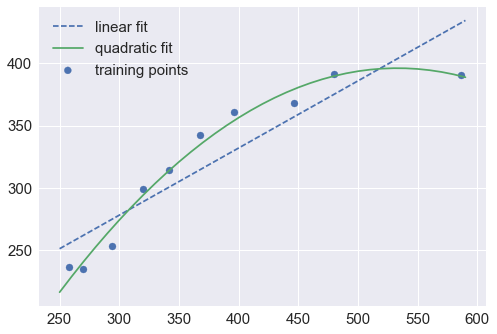

In [17]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))
plt.scatter(X, y, label="training points")
plt.plot(X_fit, y_lin_fit,
        label="linear fit", linestyle="--")
plt.plot(X_fit, y_quad_fit,
        label="quadratic fit")
plt.legend()

### Modeling nonlinear relationships in the Housing Dataset

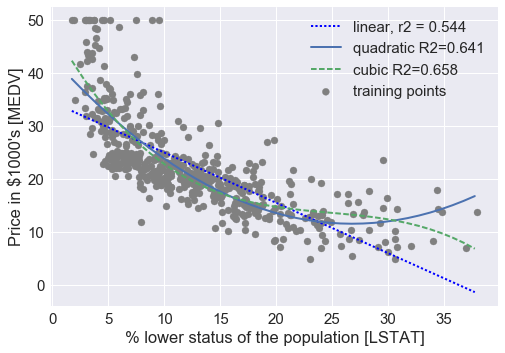

In [18]:
X = df[["LSTAT"]].values
y = df["MEDV"].values
regr = LinearRegression()

# polymomial
quandratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quandratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

#linear fit
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# quandratic fit
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quandratic.fit_transform(X_fit))
quad_r2 = r2_score(y, regr.predict(X_quad))

# cubic fit
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

#plot
plt.scatter(X, y,
           label="training points",
           color="gray")
plt.plot(X_fit, y_lin_fit,
        label="linear, r2 = %.3f" %linear_r2,
        color="blue",
        lw=2, linestyle=":")
plt.plot(X_fit, y_quad_fit,
        label="quadratic R2=%.3f" %quad_r2,
        lw=2, linestyle="-")
plt.plot(X_fit, y_cubic_fit,
        label="cubic R2=%.3f" %cubic_r2,
        lw=2, linestyle="--")
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

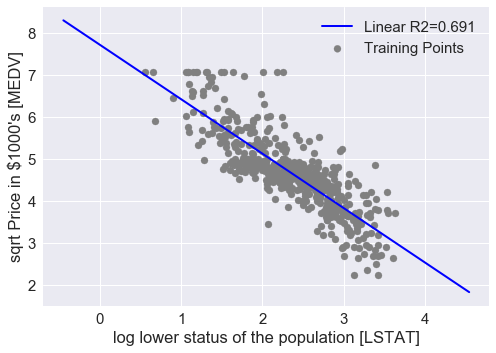

In [19]:
X_log = np.log(X)
y_sqrt = np.sqrt(y)
X_fit = np.arange(X_log.min()-1,
                  X_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))
plt.scatter(X_log, y_sqrt, label="Training Points",
           color="gray")
plt.plot(X_fit, regr.predict(X_fit),
        label="Linear R2=%.3f" %linear_r2,
        color="blue", lw=2)
plt.xlabel('log lower status of the population [LSTAT]')
plt.ylabel('sqrt Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

# Dealing with nonlinear relationships using random forests

## Decision tree regression

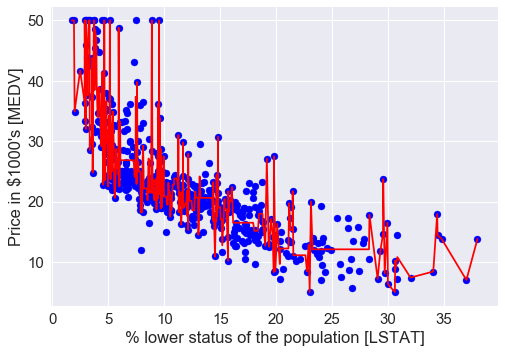

In [21]:
from sklearn.tree import DecisionTreeRegressor
X = df[["LSTAT"]].values
y = df["MEDV"].values
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')

## Random forest regression

In [24]:
X = df.iloc[:, :-1].values
y = df["MEDV"].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.4,
                        random_state=1)
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,
                              criterion="mse",
                              random_state=1,
                              n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print("MSE train: %.3f, test: %.3f" %(
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)
    ))
print("R2 train :%.3f, test: %3f" %(
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)
    ))

MSE train: 1.642, test: 11.052
R2 train :0.979, test: 0.877629


<function matplotlib.pyplot.show>

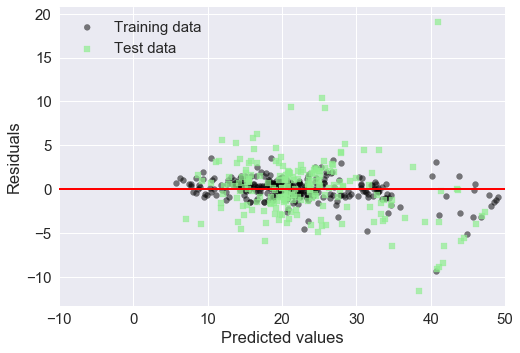

In [26]:
plt.scatter(y_train_pred,
           y_train_pred - y_train,
           c="black", marker="o",
           s=35, alpha=0.5,
           label="Training data")
plt.scatter(y_test_pred,
           y_test_pred - y_test,
           c="lightgreen", marker="s",
           s=35, alpha=0.7,
           label="Test data")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show